CSCE 5215 Homework assignment 3

name: Thai Ha Dang -

Google Colab: https://drive.google.com/file/d/1TkQk5YjAStSRcjOrmzpPLrNyRmkKNk6p/view?usp=sharing



# Q1. SVM regression

# 1.1 Prepare dataset

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR, SVC

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/hadt222/CSCE5215/refs/heads/main/CSCE5215_assignment3/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check for null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [4]:
# Convert Categorical Values to Numeric
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [5]:
# Features and target
X = df.drop('charges', axis=1)
y = df['charges']

In [6]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (936, 6)
Test set size: (402, 6)


# 1.2 Visualization

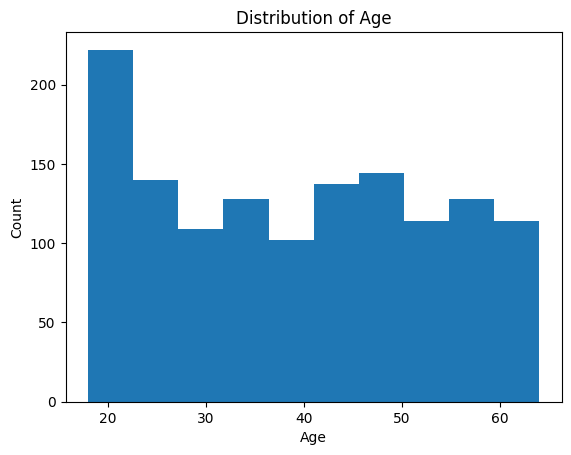

In [7]:
# Histograms (Age, BMI, Charges)
# Histogram for Age
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


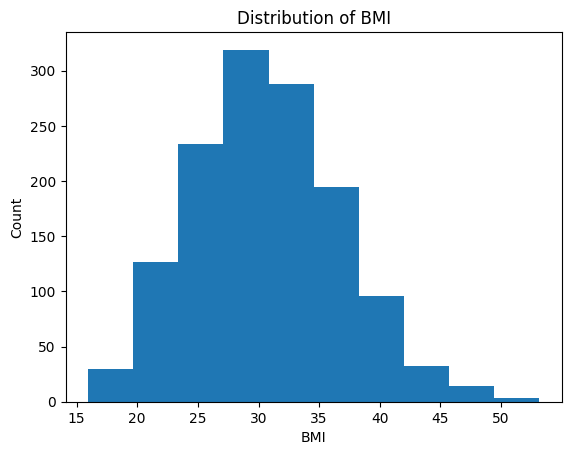

In [8]:
# Histogram for bmi
plt.hist(df['bmi'], bins=10)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

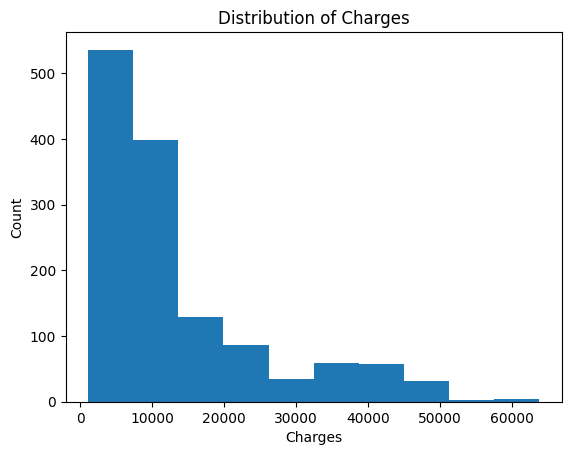

In [9]:
# Histogram for charges
plt.hist(df['charges'], bins=10)
plt.xlabel('Charges')
plt.ylabel('Count')
plt.title('Distribution of Charges')
plt.show()

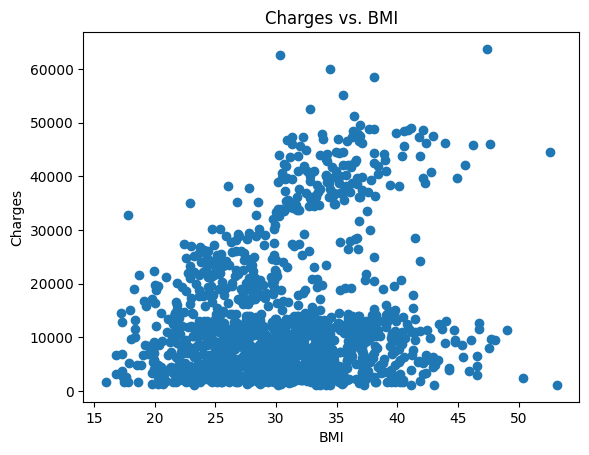

In [10]:
# scatter plot for Changes vs BMI
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charges vs. BMI')
plt.show()


# 1.3 Train model

In [11]:
# Step 3: Train SVM Regression Models
# Linear kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

SVR(kernel='linear')

In [12]:
# Polynomial kernel
svr_poly = SVR(kernel='poly', degree=3)
svr_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [13]:
# Bootstrap function
def bootstrap_prediction(model, X_train, y_train, X_test, n_iterations=100):
    predictions = []
    for _ in range(n_iterations):
        # Create bootstrap sample
        indices = np.random.choice(len(X_train), len(X_train), replace=True)
        X_boot = X_train[indices]
        y_boot = y_train.iloc[indices] if isinstance(y_train, pd.Series) else y_train[indices]

        model.fit(X_boot, y_boot)
        pred = model.predict(X_test)
        predictions.append(pred)
    return np.array(predictions)

In [14]:
# Get bootstrap predictions
boot_pred_linear = bootstrap_prediction(svr_linear, X_train, y_train, X_test)
boot_pred_poly = bootstrap_prediction(svr_poly, X_train, y_train, X_test)

In [26]:
# Step 4: Evaluation
# Linear kernel evaluation
y_pred_linear = svr_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Poly kernel evaluation
y_pred_poly = svr_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Bootstrap confidence intervals
ci_linear = np.percentile(boot_pred_linear, [2.5, 97.5], axis=0)
ci_poly = np.percentile(boot_pred_poly, [2.5, 97.5], axis=0)

print("\nLinear Kernel Results:")
print(f"MSE: {mse_linear:.2f}")
print(f"R2 Score: {r2_linear:.2f}")

print("\nPolynomial Kernel Results:")
print(f"MSE: {mse_poly:.2f}")
print(f"R2 Score: {r2_poly:.2f}")



Linear Kernel Results:
MSE: 142043686.71
R2 Score: 0.03

Polynomial Kernel Results:
MSE: 157441169.80
R2 Score: -0.07


In [37]:
# print Bootstrap confidence intervals
print("\nBootstrap Confidence Intervals:")
print(f"Linear Kernel: {ci_linear}")
print(f"Polynomial Kernel: {ci_poly}")


Bootstrap Confidence Intervals:
Linear Kernel: [[ 8693.4331998   8293.23362554 10332.88641293  8729.60468654
   8805.71453928  8320.27321029  7580.14102755  9419.53826343
   7901.07751273  8881.68690951  9089.1514719   8586.0534339
   8013.67107226  9929.17775407 10319.07338999  9906.21500654
   8972.51170971  9815.05177483  8612.45424858  9570.43894494
   7913.41710497  8556.42738687  7569.16499822  7999.61341554
   8889.17818961  9066.40968848  9108.69175856  8091.59024288
   8784.49151728  7588.99208949  8478.08624638  9090.15921256
   7742.60968209  8043.92789972  7853.1161632   8820.65211749
   7616.59669943  8464.58740642  9907.65143871  9439.74660398
   7745.74880451  7854.77075334  9009.17771783  9076.8069702
   8294.18891444  9032.41507131  7884.43511689  7818.29123197
   9751.76627775  8258.60309315  9303.29892055  7608.96938126
   8653.70850419  7652.18008267  9032.20079757  8976.61786665
   8085.70259073  9358.05624786  9003.68668382  9038.41550922
   9171.81959167  8282.4

Model Comparison and Conclusion

* MSE Comparison: The linear kernel model has a lower MSE (142,043,686.71) compared to the polynomial kernel model (157,441,169.80). This indicates that the linear model’s predictions are, on average, closer to the actual insurance charges, though both MSE values are quite high, suggesting overall poor predictive performance.
* R² Comparison: The linear kernel model’s R² score (0.03) is slightly positive, indicating that it explains a small fraction (3%) of the variance in insurance charges. In contrast, the polynomial kernel model’s R² score (-0.07) is negative, meaning it performs worse than a simple mean prediction, failing to capture any meaningful variance in the data.

The linear kernel SVM regression model outperforms the polynomial kernel model. This conclusion is supported by its lower MSE (142,043,686.71 vs. 157,441,169.80), higher R² score (0.03 vs. -0.07), and generally tighter bootstrap confidence intervals. However, both models exhibit poor overall performance, as indicated by the high MSE values and low (or negative) R² scores. The linear model’s slight edge suggests that the relationship between the features (age, sex, BMI, children, smoker, region) and insurance charges may have some linear components, but neither model effectively captures the full complexity of the data. The polynomial kernel’s negative R² score indicates it may be overfitting or introducing unnecessary complexity, making it less suitable for this dataset.

# Q2. SVM classification model

# 2.1

In [16]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/hadt222/CSCE5215/refs/heads/main/CSCE5215_assignment3/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# Check for null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [18]:
# Convert Categorical Values to Numeric
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [19]:
# Features and target for classification
X_class = df.drop('sex', axis=1)
y_class = df['sex']

# Normalize features
X_class_scaled = scaler.fit_transform(X_class)

# Split the data 80-20
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)

# 2.2
Visualize the data using bar plot to analyze smoker vs sex. Plot a correlation heatmap to understand
feature relationships. (10 Points)

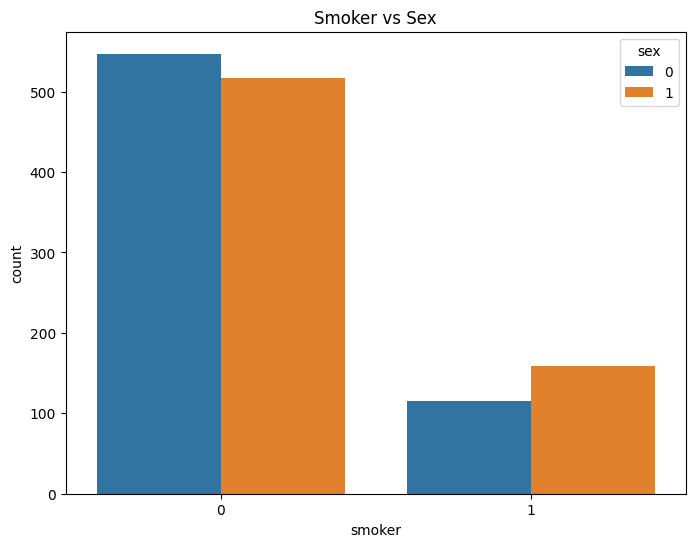

In [20]:
# Step 2: Visualization
# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', hue='sex', data=df)
plt.title('Smoker vs Sex')
plt.show()

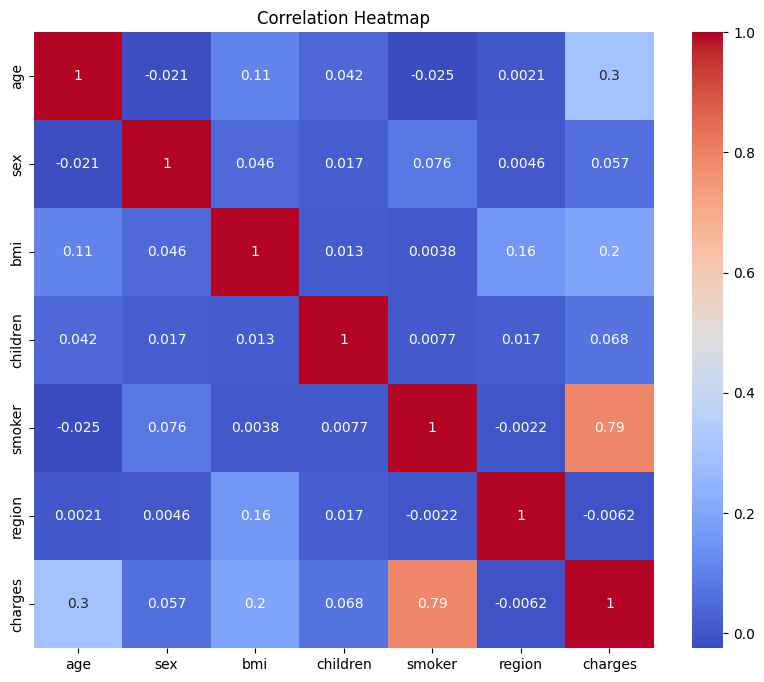

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2.3
Train the model using SVM classifier. Use rbf kernel. Train the model using K-fold cross validation
and LOOCV. (20 Points)

In [22]:
# Step 3: Train SVM Classifier
svc = SVC(kernel='rbf')

# K-fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_scores = []

for train_idx, val_idx in kfold.split(X_class_scaled):
    X_train_k = X_class_scaled[train_idx]
    y_train_k = y_class.iloc[train_idx]
    X_val_k = X_class_scaled[val_idx]
    y_val_k = y_class.iloc[val_idx]

    svc.fit(X_train_k, y_train_k)
    score = svc.score(X_val_k, y_val_k)
    kfold_scores.append(score)

# LOOCV
loo = LeaveOneOut()
loo_scores = []

for train_idx, val_idx in loo.split(X_class_scaled):
    X_train_l = X_class_scaled[train_idx]
    y_train_l = y_class.iloc[train_idx]
    X_val_l = X_class_scaled[val_idx]
    y_val_l = y_class.iloc[val_idx]

    svc.fit(X_train_l, y_train_l)
    score = svc.score(X_val_l, y_val_l)
    loo_scores.append(score)

# Train final model
svc.fit(X_train_c, y_train_c)
y_pred_c = svc.predict(X_test_c)

# 2.4
Evaluate the model using accuracy score, precision, f1 score, recall. Compare performance between K-fold cv and LOOCV.

In [23]:
# Step 4: Evaluation
accuracy = accuracy_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)

print("\nTest Set Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nCross-validation Results:")
print(f"K-fold CV Mean Accuracy: {np.mean(kfold_scores):.2f} (+/- {np.std(kfold_scores):.2f})")
print(f"LOOCV Mean Accuracy: {np.mean(loo_scores):.2f} (+/- {np.std(loo_scores):.2f})")


Test Set Results:
Accuracy: 0.52
Precision: 0.50
Recall: 0.48
F1 Score: 0.49

Cross-validation Results:
K-fold CV Mean Accuracy: 0.52 (+/- 0.04)
LOOCV Mean Accuracy: 0.52 (+/- 0.50)


Model Evaluation and Comparison

* Test Set Performance:
** The accuracy of 0.52 indicates that the model correctly predicts the sex of 52% of the test instances, barely above random guessing (0.50 for a binary classification). This suggests poor discriminative power.
** Precision (0.50) shows that half of the instances predicted as positive (e.g., female) are correct, indicating moderate reliability in positive predictions.
** Recall (0.48) reveals that the model identifies only 48% of all actual positive instances, missing more than half of the true positives.
** The F1 score (0.49) balances precision and recall, confirming the model’s overall weak performance, as it struggles to effectively classify the sex based on the given features.
* Cross-Validation Comparison:
** K-fold CV: The mean accuracy of 0.52 matches the test set result, with a standard deviation of 0.04. This low variability (±0.04) suggests consistent performance across the 5 folds, implying that the model’s accuracy is stable but still poor, hovering around random guessing.
** LOOCV: The mean accuracy is also 0.52, but the standard deviation is much higher (±0.50). This large variability indicates that the model’s performance fluctuates significantly when tested on individual instances, likely due to the small dataset size and the sensitivity of LOOCV to outliers or noisy data points.

* Comparison: Both methods yield the same mean accuracy (0.52), suggesting that the model’s overall predictive ability is consistent regardless of the validation approach. However, K-fold CV provides a more reliable estimate of performance due to its lower standard deviation (0.04 vs. 0.50), making it less sensitive to individual data points. LOOCV’s high variability (±0.50) reflects its exhaustive nature but also its instability with this small dataset, where a single misclassification can drastically affect the variance.
* Conclusion:
The SVM classifier with an RBF kernel exhibits poor performance in predicting sex, with test set metrics (accuracy: 0.52, precision: 0.50, recall: 0.48, F1: 0.49) indicating it performs only slightly better than random guessing. Comparing K-fold CV and LOOCV, both yield a mean accuracy of 0.52, but K-fold CV (with ±0.04) is preferable due to its lower variability, providing a more stable and computationally efficient assessment of the model’s performance. LOOCV’s high standard deviation (±0.50) highlights its sensitivity to individual instances, making it less practical for this small dataset. Overall, the model struggles to leverage the features effectively, suggesting that either the features are not strongly predictive of sex or the RBF kernel requires hyperparameter tuning (e.g., adjusting C or gamma) to improve classification.